In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

In [36]:
dataset = pd.read_csv("IMDB Dataset.csv")

In [37]:
dataset.columns

Index(['review', 'sentiment'], dtype='object')

In [38]:
documents = dataset["review"]

In [42]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[\d+]', "", text)
    text = re.sub(r'[^\w\s]', "", text)
    stopwords_eng = stopwords.words("english")
    text = " ".join([word for word in text.split() if text.lower() not in stopwords_eng])
    text = " ".join([word for word in text.split() if len(word) > 2])
    return text

cleaned_documents = [clean_text(text) for text in documents]

In [43]:
tokenized_documents = [simple_preprocess(cleaned_document) for cleaned_document in cleaned_documents]

In [44]:
word2_vec_model = Word2Vec(tokenized_documents, vector_size = 50, window = 5, min_count = 1, sg = 0)

In [45]:
word_vectors = word2_vec_model.wv

words = list(word_vectors.index_to_key)[:500]
vectors = [word_vectors[word] for word in words]

In [46]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(vectors)
clusters = kmeans.labels_ # 0,1

In [47]:
clusters[:10]

array([0, 0, 2, 2, 3, 0, 2, 2, 2, 2])

In [48]:
pca = PCA(n_components = 2)
reduced_vectors = pca.fit_transform(vectors)

In [49]:
reduced_vectors[:10]

array([[ 1.05778196, -1.90398439],
       [ 2.00120987, -0.47918558],
       [-3.37208517, -4.13788883],
       [ 0.32048487, -5.92355712],
       [-1.61500456,  3.87363206],
       [ 2.33620617,  1.11998785],
       [-0.06857766, -1.47690631],
       [-4.14105184, -3.54460773],
       [-1.09273027, -3.59529561],
       [-3.99223978, -1.59031385]])

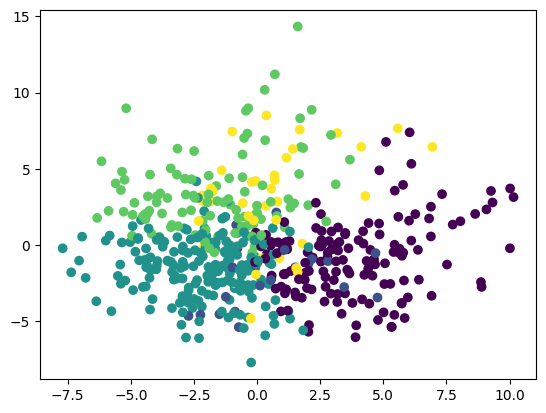

In [50]:
plt.figure()
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c = clusters, cmap = "viridis")

In [51]:
centers = pca.transform(kmeans.cluster_centers_)
centers

array([[ 3.75545924, -0.85709401],
       [ 0.17223833, -1.9671041 ],
       [-2.14321523, -1.53293752],
       [-1.68577901,  3.42612471],
       [ 0.51481954,  2.94525296]])

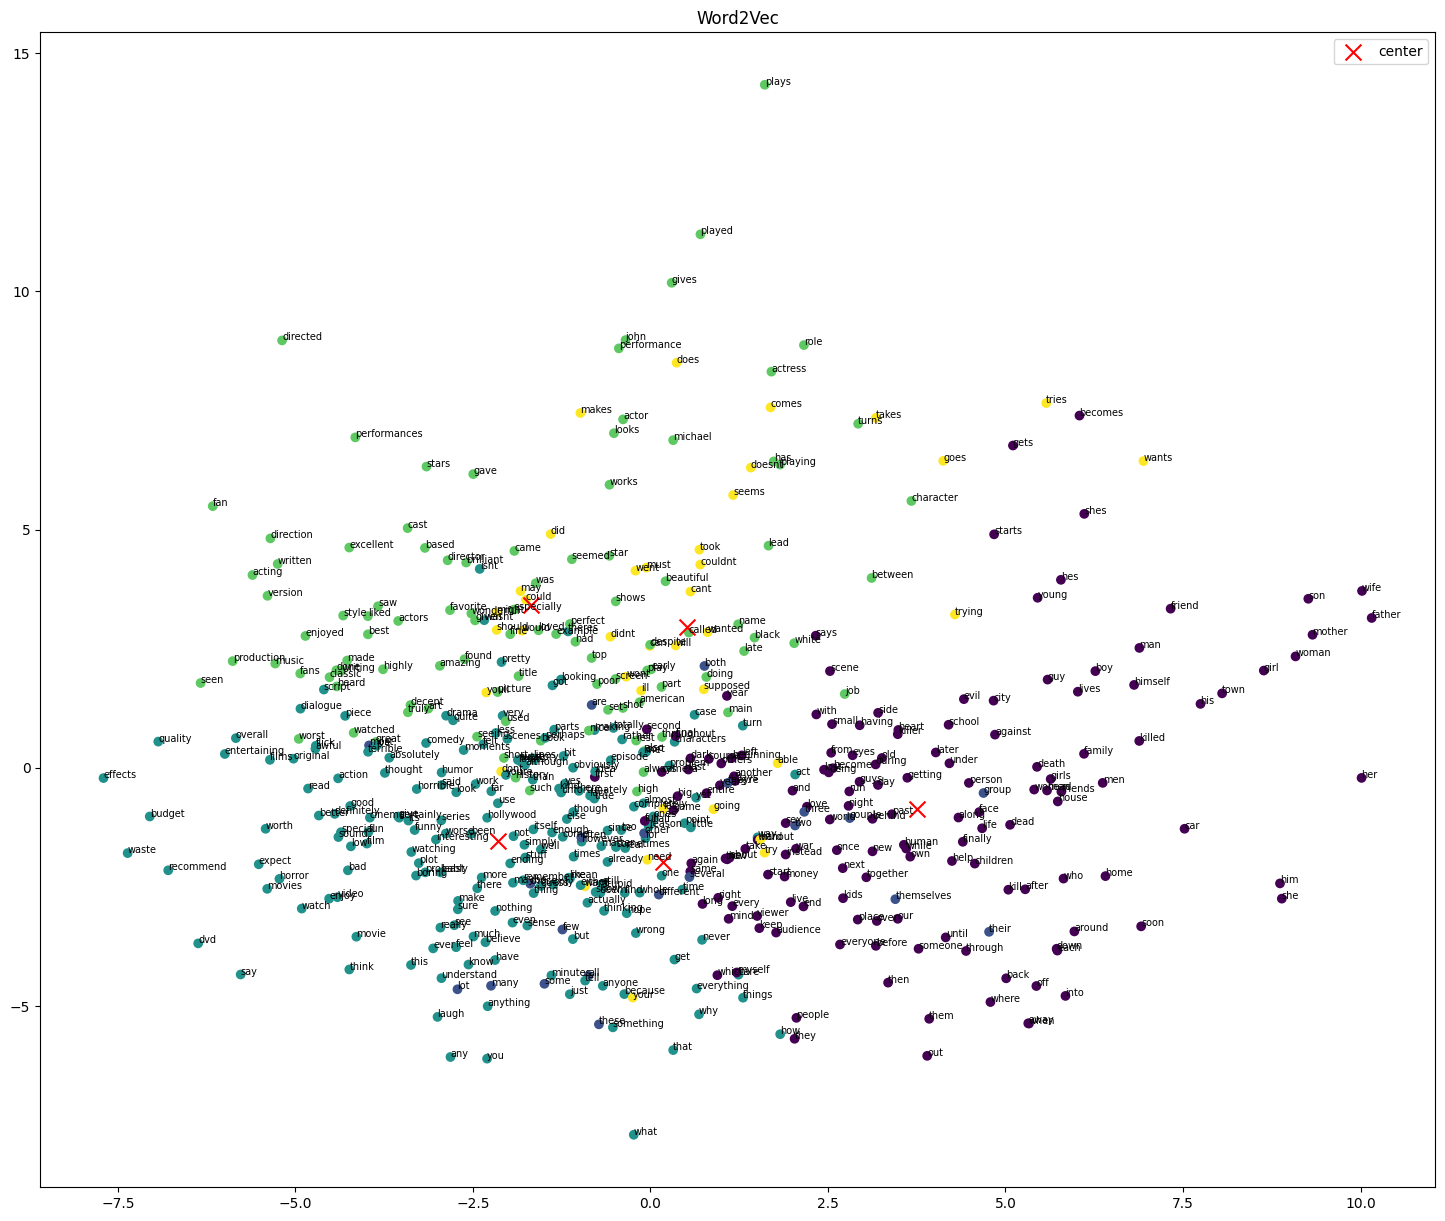

In [52]:
plt.figure(figsize=(18,15))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c = clusters, cmap = "viridis")
plt.scatter(centers[:, 0], centers[:, 1], c = "red", marker = 'x', s = 130, label = "center")
for i, word in enumerate(words):
    plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], word, fontsize = 7)
plt.title("Word2Vec")
plt.legend()